In [16]:
import os
import logging
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pypots.utils.logging import logger as pypots_logger
from tsdb.utils.logging import logger
import warnings

pypots_logger.setLevel(logging.ERROR)
warnings.simplefilter("ignore", FutureWarning)
logger.setLevel(logging.ERROR)

sys.path.append(os.path.abspath('..'))
from src.imputer import Imputer

df = pd.read_csv('./src/data/PRSA_Data_Changping_20130301-20170228.csv')
i = Imputer(df, independent='PM10', features=['O3', 'TEMP', 'DEWP', 'WSPM', 'NO2', 'SO2'], neighbors=8)

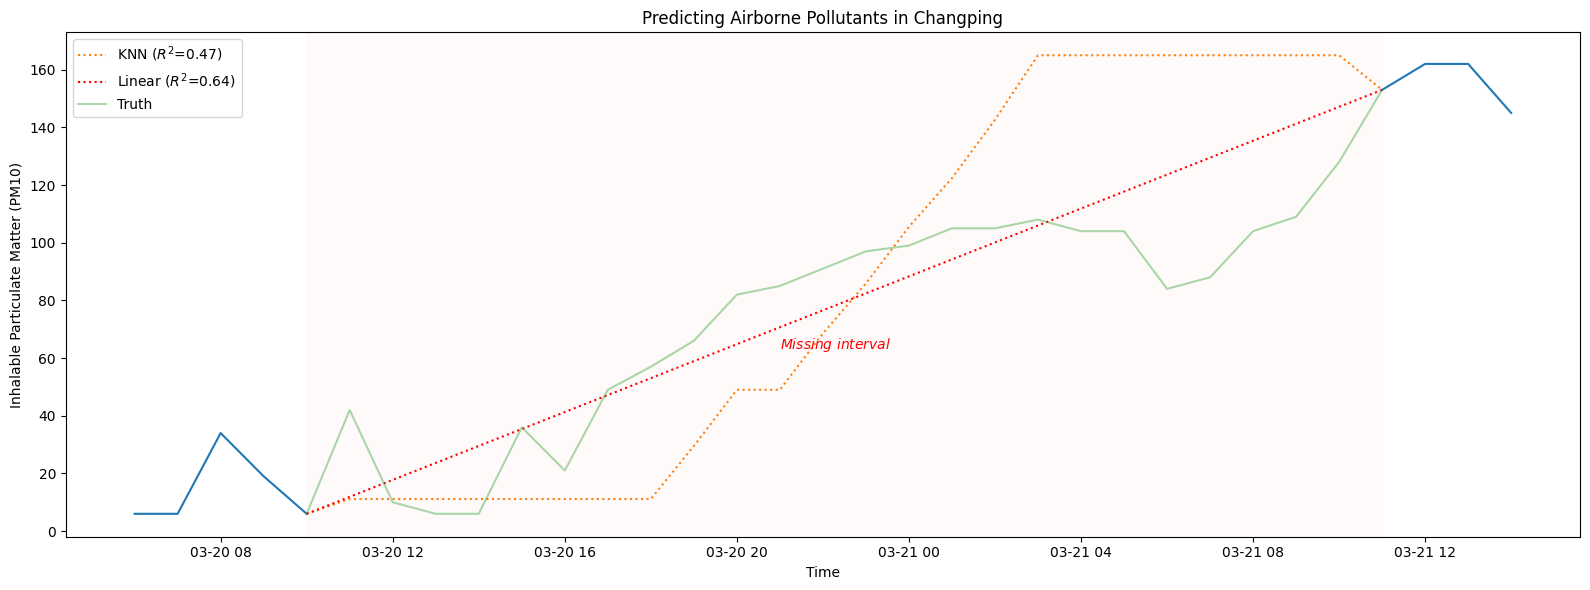

In [15]:
null_indices = range(i.null_indices[24]-1, i.null_indices[47]+2)
masked_indices = range(i.null_indices[24]-5, i.null_indices[47]+5)

truth = i.data['PM10'].iloc[null_indices]
knn = i.knn_predictions_df['PM10'].iloc[null_indices]
lerp = i.lerp_predictions_df['PM10'].iloc[null_indices]

plt.figure(figsize=(16, 6))
plt.plot(i.masked_data_df['PM10'].iloc[masked_indices])
plt.plot(knn, linestyle=':', label=f'KNN ($R^2$={i.knn_r_score():.2f})')
plt.plot(lerp, linestyle=':', color='r', label=f'Linear ($R^2$={i.lerp_r_score():.2f})')
plt.plot(truth, alpha=0.4, label="Truth")
plt.axvspan(truth.index[0], truth.index[-1], color='red', alpha=0.02)
plt.annotate("$\it{Missing\ interval}$", (truth.index[11], 63), color='red')
plt.title("Predicting Airborne Pollutants in Changping")
plt.xlabel("Time")
plt.ylabel("Inhalable Particulate Matter (PM10)")
plt.legend()
plt.tight_layout()
plt.show()